To perform validation and evaluation of Principal Component Analysis (PCA) using a built-in dataset from scikit-learn, we will follow these steps:

1. **Import Necessary Libraries:**
2. **Load the Dataset:**
3. **Apply PCA:**
4. **Evaluate the Explained Variance:**
5. **Visualize the Results:**

We will use the Iris dataset for this example.

1. **Import Necessary Libraries:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

2. **Load the Dataset:**

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

3. **Standardize the Data:**

PCA is affected by the scale of the data, so it's important to standardize it:

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

4. **Apply PCA:**

Fit PCA to the standardized data and transform it:

In [4]:
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

5. **Evaluate the Explained Variance:**

The explained variance ratio tells us how much variance is captured by each principal component:

In [5]:
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance ratio: {explained_variance}')
print(f'Total explained variance: {np.sum(explained_variance)}')

Explained variance ratio: [0.72962445 0.22850762]
Total explained variance: 0.9581320720000165


6. **Visualize the Results:**

Plot the first two principal components:

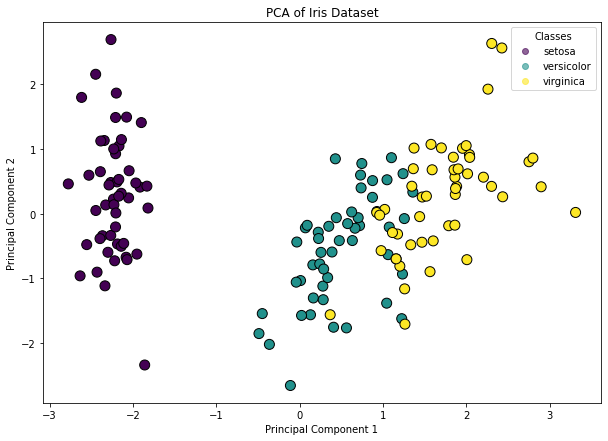

In [6]:
# Visualize the results
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')

# Create a legend
handles, _ = scatter.legend_elements(prop="colors", alpha=0.6)
plt.legend(handles, iris.target_names, title="Classes")
plt.show()

### Additional Evaluation Metric: Cumulative Explained Variance

To determine the optimal number of components that capture the most variance, plot the cumulative explained variance:

In [7]:
# Apply PCA with all components
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

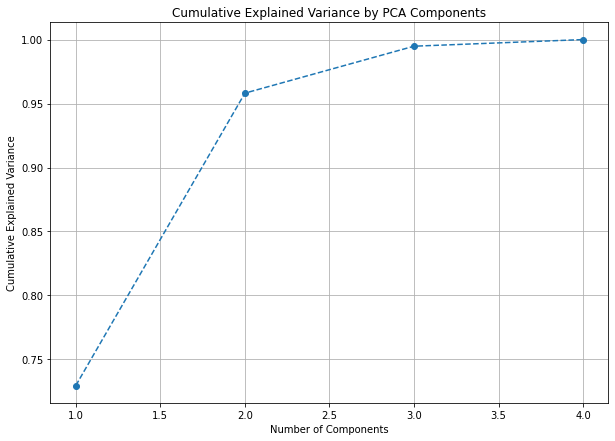

In [8]:
# Plot cumulative explained variance
cumulative_explained_variance = np.cumsum(pca_full.explained_variance_ratio_)
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid()
plt.show()

### Interpretation

- **Explained Variance Ratio:** This tells us how much variance is captured by each principal component.
- **Total Explained Variance:** Sum of the explained variance ratios, indicating the proportion of total variance captured by the selected components.
- **Cumulative Explained Variance Plot:** Helps in choosing the number of components that capture the desired amount of variance (e.g., 95%).